#**Importations**

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


#**Loading the dataset**

In [15]:
df_bot_basic= pd.read_csv("/content/drive/MyDrive/ML-AI projects/Bot_detection_using_biometric_user_interaction _data_PROJET_METIER_4A/bot-detection-using-interaction-data/captcha bot detection/model_building/datasets/captcha_bot_basic.csv")
df_bot_advanced= pd.read_csv("/content/drive/MyDrive/ML-AI projects/Bot_detection_using_biometric_user_interaction _data_PROJET_METIER_4A/bot-detection-using-interaction-data/captcha bot detection/model_building/datasets/captcha_bot_intelligent.csv")
df_human= pd.read_csv("/content/drive/MyDrive/ML-AI projects/Bot_detection_using_biometric_user_interaction _data_PROJET_METIER_4A/bot-detection-using-interaction-data/captcha bot detection/model_building/datasets/captcha_human.csv")


#add a column in each dataset to give it a class
df_bot_basic["class"]=0
df_bot_advanced["class"]=1
df_human["class"]=2

# make one dataset
df=pd.concat([df_bot_basic,df_bot_advanced,df_human])

# display first few rows and some general info
print(df.head(10))
print("-------------------------------------------------------------------------\n The shape is :\n",df.shape)
print("-------------------------------------------------------------------------\n The information  is :\n",df.info())
print("-------------------------------------------------------------------------\n The data description is :\n",df.describe())


      attempt_id  success correct_answer user_answer  total_time  \
0  1742930151115    False            NaN       ymp7g      2201.0   
1  1742930155923     True          n6f4b       n6f4b      2015.0   
2  1742930160593     True          wye85       wye85      2047.0   
3  1742930165256     True          m5ym2       m5ym2      2099.0   
4  1742930170026     True          3p67n       3p67n      1987.0   
5  1742930174644     True          e7nx4       e7nx4      2056.0   
6  1742930179336     True          f7cey       f7cey      2006.0   
7  1742930183992    False          87nym        87mm      1844.0   
8  1742930188445     True          nd5wg       nd5wg      1990.0   
9  1742930193086     True          gf2g4       gf2g4      2009.0   

   mouse_move_count  avg_mouse_speed  max_mouse_speed  click_count  \
0                 1         0.000000         0.000000            0   
1                 2         0.103039         0.132053            0   
2                 3         0.144851     

#**Drop features with one unique value and handle missing values**

In [16]:
print("unique values per feature is : \n",df.nunique())

#drop features with one unique value
columns_to_drop=[col for col in df.columns if df[col].nunique()==1]
print("\n columns to drop are : \n",columns_to_drop)
print("\n shape before droping : ",df.shape)
df= df.drop(columns_to_drop, axis=1)
print("\n shape after droping : ",df.shape)

#check for missing values
missing_values=df.isnull().sum()
print("\n missing values are : \n",missing_values)

#if missing values are less than 1% of the dataset drop the rows
missing_values_percentage=(missing_values/df.shape[0])*100
print("\n missing values percentage (in percentage) are : \n",missing_values_percentage)
df=df.dropna()
print("\n shape after droping missing values : ",df.shape)

#drop the id because its given randomly
df=df.drop("attempt_id",axis=1)


unique values per feature is : 
 attempt_id            1714
success                  2
correct_answer         840
user_answer            904
total_time            1262
mouse_move_count       212
avg_mouse_speed       1614
max_mouse_speed        552
click_count              1
avg_click_interval       1
keypress_count           1
backspace_count          1
input_change_count      13
final_input_length       7
edit_distance            6
time_per_character    1275
error_rate              12
class                    3
dtype: int64

 columns to drop are : 
 ['click_count', 'avg_click_interval', 'keypress_count', 'backspace_count']

 shape before droping :  (1714, 18)

 shape after droping :  (1714, 14)

 missing values are : 
 attempt_id            0
success               0
correct_answer        3
user_answer           0
total_time            0
mouse_move_count      0
avg_mouse_speed       0
max_mouse_speed       0
input_change_count    0
final_input_length    0
edit_distance         0
time_

#**check and drop outliers**

(1711, 10)


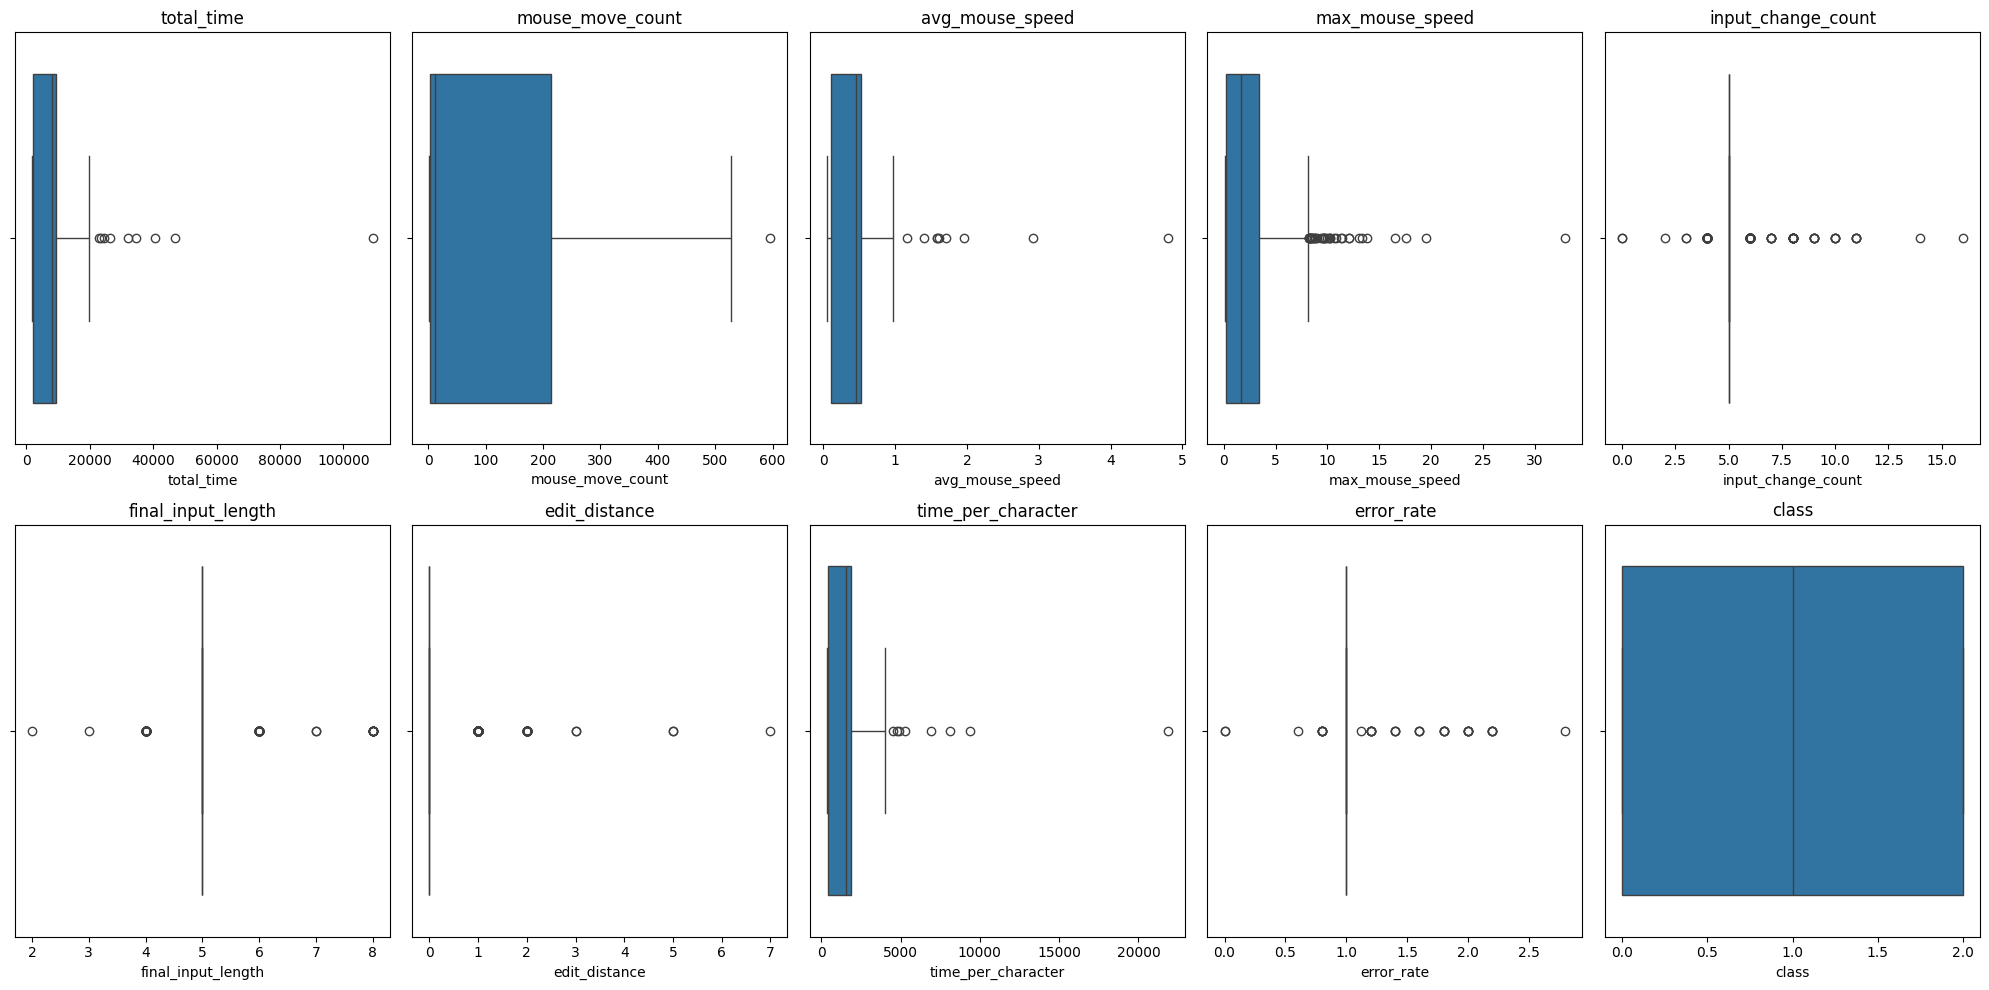

shape after dropping outliers :  (1708, 13)


In [17]:
#check for outliers
df_num_features=df.select_dtypes(include=[np.number])
print(df_num_features.shape)

#visualize outliers using seaborn for each numerical feature in a plot window 2 rows 5 columns
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()
for i, col in enumerate(df_num_features.columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

#drop all rows with a total time greater than 40000
df = df[df['total_time'] <= 40000]
print("shape after dropping outliers : ",df.shape)




#**correlation matrix**

(1708, 11)


<ipython-input-18-7f5567d843c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['success'] = df['success'].astype(int)


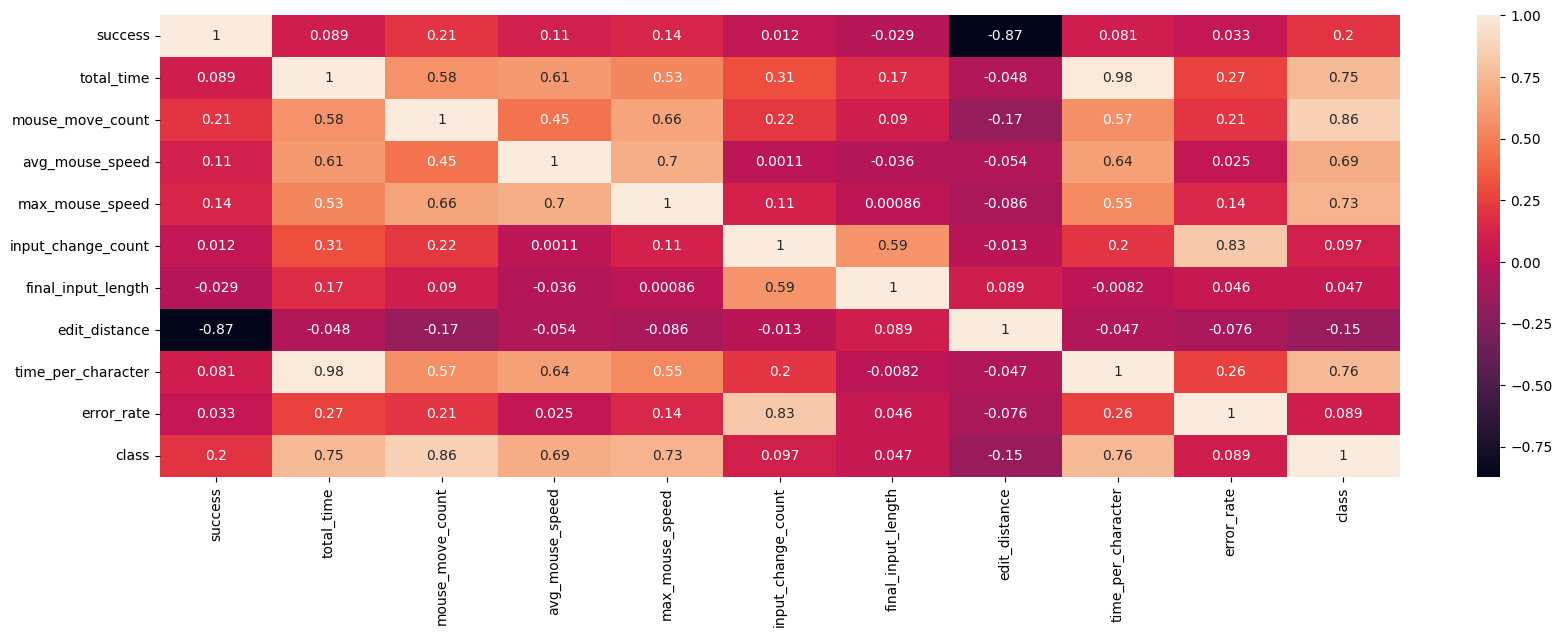

In [18]:
#change the tru false in the sucess feature into 1 and 0
df['success'] = df['success'].astype(int)

# output the correlation matrix heatmap for numeric features

df_num_features=df.select_dtypes(include=[np.number])
print(df_num_features.shape)

corr_matrix=df_num_features.corr()
plt.figure(figsize=(20,6))
sns.heatmap(corr_matrix,annot=True)
plt.show()

#**Encoding categorical data**

shape of categorical values is :  (1708, 2)
unique values per feature is : 
 correct_answer    839
user_answer       903
dtype: int64


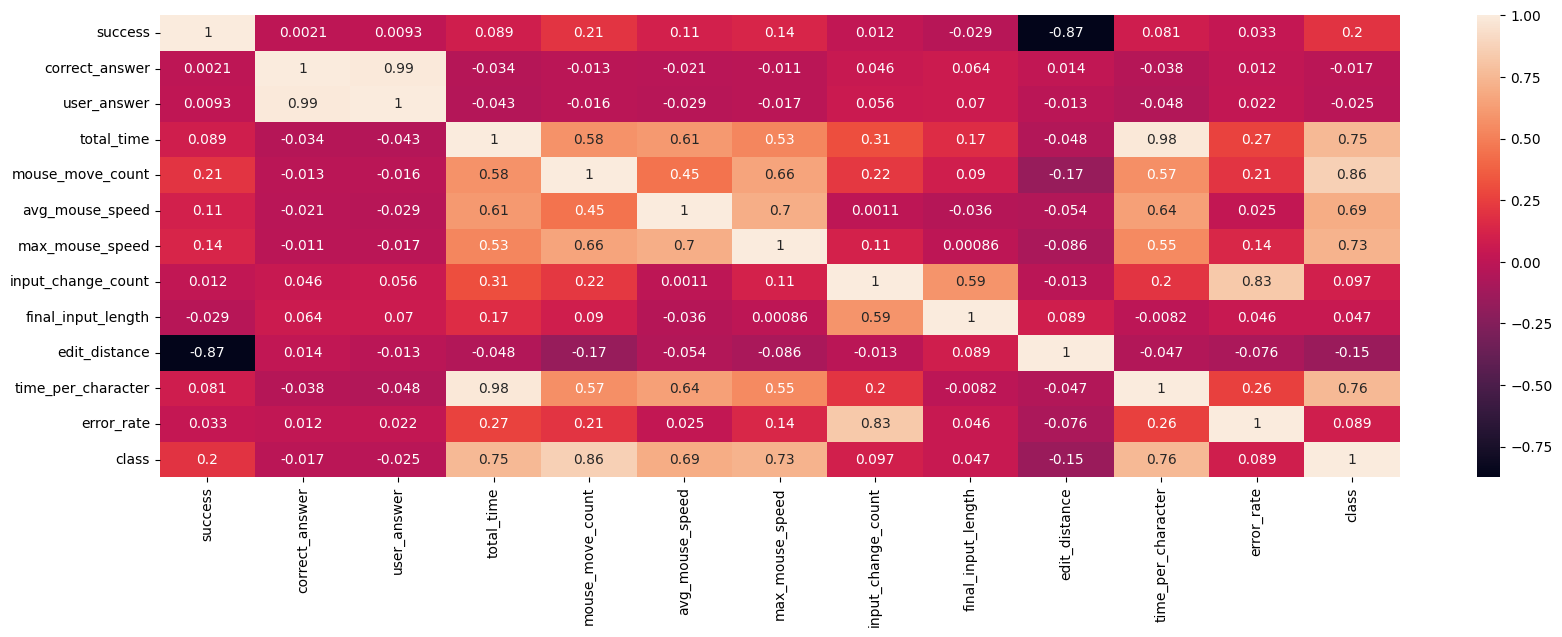

Index(['correct_answer', 'user_answer'], dtype='object')


In [19]:
#get the feature with categorical values
df_categ = df.select_dtypes(include=['object'])
print("shape of categorical values is : ",df_categ.shape)

#unique values
print("unique values per feature is : \n",df_categ.nunique())

#apply label encoding
lb=LabelEncoder()
for col in df_categ.columns:
    df[col]=lb.fit_transform(df[col])


# remake the heatmap
corr_matrix=df.corr()
plt.figure(figsize=(20,6))
sns.heatmap(corr_matrix,annot=True)
plt.show()

#drop the cat features due to low correlation
print(df_categ.columns)
df=df.drop(df_categ.columns, axis=1)


#**Splitting data into target and independent**

In [20]:
#save the dataset
df.to_csv("/content/drive/MyDrive/ML-AI projects/Bot_detection_using_biometric_user_interaction _data_PROJET_METIER_4A/bot-detection-using-interaction-data/captcha bot detection/model_building/datasets/preprocessed_dataset.csv",index=False)